In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from learnML.regression import UnivariateLinearRegression
from learnML.preprocessing import train_test_split

In [3]:
data = pd.read_csv("data/salary_data.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
model = UnivariateLinearRegression(learning_rate=0.001, n_iterations=1000)
model.fit(X_train, y_train)

Iteration:     0 | Cost: 2.755500e+09
Iteration:   100 | Cost: 8.498536e+07
Iteration:   200 | Cost: 7.766289e+07
Iteration:   300 | Cost: 7.517891e+07
Iteration:   400 | Cost: 7.280531e+07
Iteration:   500 | Cost: 7.052950e+07
Iteration:   600 | Cost: 6.834743e+07
Iteration:   700 | Cost: 6.625526e+07
Iteration:   800 | Cost: 6.424927e+07
Iteration:   900 | Cost: 6.232591e+07
Iteration:  1000 | Cost: 6.049984e+07


In [6]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(
    np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
)

[[ 25710.23  37731.  ]
 [136482.94 122391.  ]
 [ 58438.53  57081.  ]
 [ 55920.97  63218.  ]
 [126412.7  116969.  ]
 [116342.45 109431.  ]
 [127671.48 112635.  ]
 [ 57179.75  55794.  ]
 [ 73543.9   83088.  ]]


In [7]:
def createFigure(subtitle):
    # Create a figure with two subplots side by side
    fig, (ax_upper, ax_lower) = plt.subplots(2, 2, figsize=(10, 8))
    fig.suptitle(subtitle)

    return ax_upper[0], ax_upper[1], ax_lower[0], ax_lower[1]


def pltTrainSet(ax, x_train, y_train, y_pred):
    # Plot the Training set in the first subplot
    ax.scatter(x_train, y_train, color="red", label="Training set")
    ax.plot(x_train, y_pred, color="blue")
    ax.set_title("Training set")
    ax.set_xlabel("x_train")
    ax.set_ylabel("y_train")
    ax.legend()


def pltTestSet(ax, x_test, y_test, y_pred):
    # Plot the Test set in the second subplot
    ax.scatter(x_test, y_test, color="red", label="Test set")
    ax.plot(x_test, y_pred, color="blue")
    ax.set_title("Salary vs Experience (Test set)")
    ax.set_xlabel("Years of Experience")
    ax.set_ylabel("Salary")
    ax.legend()


def pltCostVsIter(ax, j_history):
    # Plot the Cost vs Iterations in the third subplot
    ax.plot(j_history)
    ax.set_title("Cost vs Iterations")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Cost")


def pltWeightsVsIter(ax, p_history):
    # Plot the weights vs Iterations in the fourth subplot
    ax.plot(p_history)
    ax.set_title("Weights vs Iterations")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Weights")
    ax.legend(["weight", "intercept"])


def plot(
    model: UnivariateLinearRegression,
    subtitle,
    x_train,
    y_train,
    x_test=None,
    y_test=None,
):
    ax1, ax2, ax3, ax4 = createFigure(subtitle)
    pltTrainSet(ax1, x_train, y_train, model.predict(x_train))

    if x_test is not None and y_test is not None:
        pltTestSet(ax2, x_test, y_test, model.predict(x_test))

    pltCostVsIter(ax3, model.get_cost_history())
    pltWeightsVsIter(ax4, model.get_parameter_history())

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

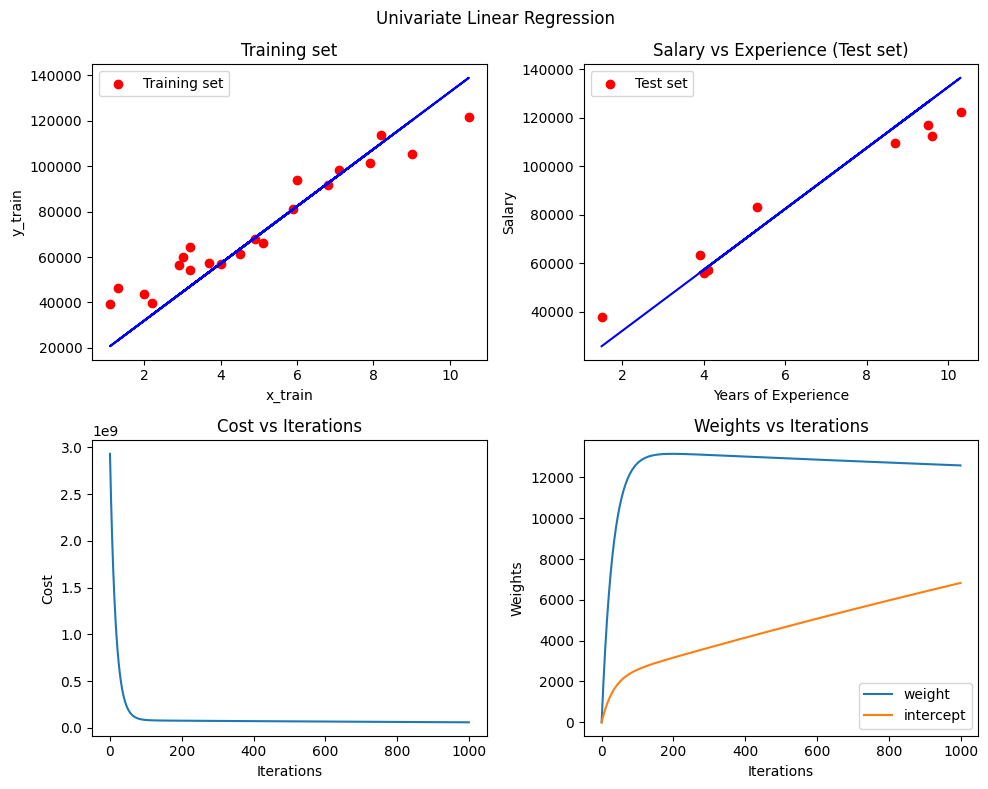

In [8]:
plot(
    model=model,
    subtitle="Univariate Linear Regression",
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
)